In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
import pickle

In [48]:
label_dict = pickle.load(open('../data/label_dict.pkl', 'rb'))

In [49]:
def train_with_10fold(model, name, data_dir='../data/orig'):
    accuracies = []
    all_preds = []
    all_labels = []

    for test_id in range(10):
        dfs = []
        for i in range(10):
            if i != test_id:
                df = pd.read_csv(f'{data_dir}/fold{i}.csv')
                dfs.append(df)
        train_df = pd.concat(dfs, ignore_index=True)
        test_df = pd.read_csv(f'{data_dir}/fold{test_id}.csv')

        # X, y
        X_train, y_train = train_df.drop(['label', 'audio'], axis=1), train_df['label']
        X_test, y_test = test_df.drop(['label', 'audio'], axis=1), test_df['label']

        # train & evaluation
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        all_preds.extend(y_pred)
        all_labels.extend(y_test)

        print(f'Fold {test_id} Accuracy: {acc:.4f}')

    print(f'\nAverage Accuracy: {np.mean(accuracies):.4f}')
    print(f'Total: {len(all_labels)}')

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (10-Fold CV) Using {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print(classification_report(all_labels, all_preds))

    return all_preds, all_labels


Fold 0 Accuracy: 0.5246
Fold 1 Accuracy: 0.4955
Fold 2 Accuracy: 0.5557
Fold 3 Accuracy: 0.5465
Fold 4 Accuracy: 0.5972
Fold 5 Accuracy: 0.5431
Fold 6 Accuracy: 0.5716
Fold 7 Accuracy: 0.5620
Fold 8 Accuracy: 0.6189
Fold 9 Accuracy: 0.5795

Average Accuracy: 0.5595
Total: 8732


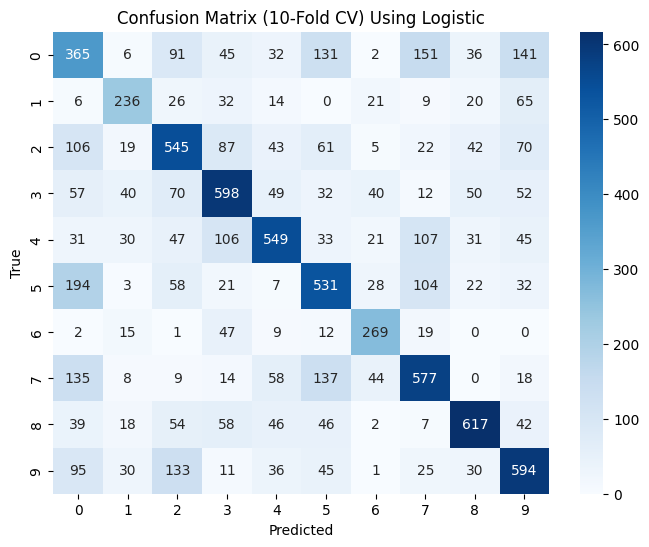

              precision    recall  f1-score   support

           0       0.35      0.36      0.36      1000
           1       0.58      0.55      0.57       429
           2       0.53      0.55      0.54      1000
           3       0.59      0.60      0.59      1000
           4       0.65      0.55      0.60      1000
           5       0.52      0.53      0.52      1000
           6       0.62      0.72      0.67       374
           7       0.56      0.58      0.57      1000
           8       0.73      0.66      0.69       929
           9       0.56      0.59      0.58      1000

    accuracy                           0.56      8732
   macro avg       0.57      0.57      0.57      8732
weighted avg       0.56      0.56      0.56      8732



In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(verbose=0)
_ = train_with_10fold(lr, 'Logistic')


Fold 0 Accuracy: 0.4490
Fold 1 Accuracy: 0.5023
Fold 2 Accuracy: 0.4551
Fold 3 Accuracy: 0.4929
Fold 4 Accuracy: 0.5566
Fold 5 Accuracy: 0.4520
Fold 6 Accuracy: 0.5036
Fold 7 Accuracy: 0.4367
Fold 8 Accuracy: 0.5650
Fold 9 Accuracy: 0.5484

Average Accuracy: 0.4962
Total: 8732


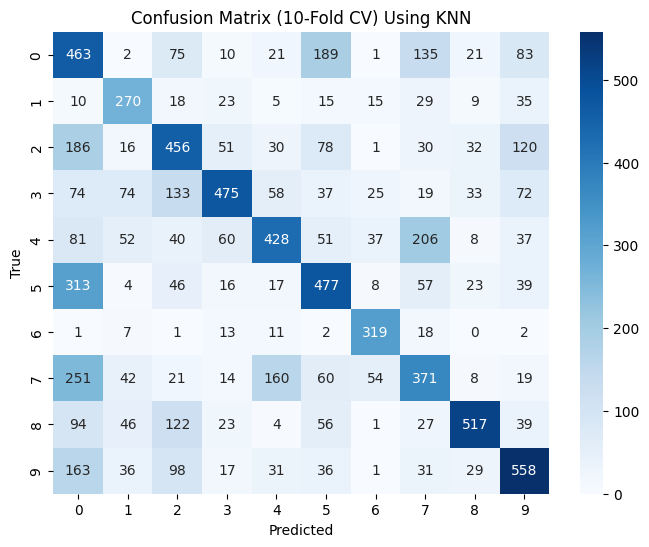

              precision    recall  f1-score   support

           0       0.28      0.46      0.35      1000
           1       0.49      0.63      0.55       429
           2       0.45      0.46      0.45      1000
           3       0.68      0.47      0.56      1000
           4       0.56      0.43      0.48      1000
           5       0.48      0.48      0.48      1000
           6       0.69      0.85      0.76       374
           7       0.40      0.37      0.39      1000
           8       0.76      0.56      0.64       929
           9       0.56      0.56      0.56      1000

    accuracy                           0.50      8732
   macro avg       0.53      0.53      0.52      8732
weighted avg       0.52      0.50      0.50      8732



In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
_ = train_with_10fold(knn, 'KNN')

Fold 0 Accuracy: 0.5876
Fold 1 Accuracy: 0.5912
Fold 2 Accuracy: 0.5081
Fold 3 Accuracy: 0.5626
Fold 4 Accuracy: 0.6132
Fold 5 Accuracy: 0.5577
Fold 6 Accuracy: 0.6718
Fold 7 Accuracy: 0.6216
Fold 8 Accuracy: 0.6581
Fold 9 Accuracy: 0.6571

Average Accuracy: 0.6029
Total: 8732


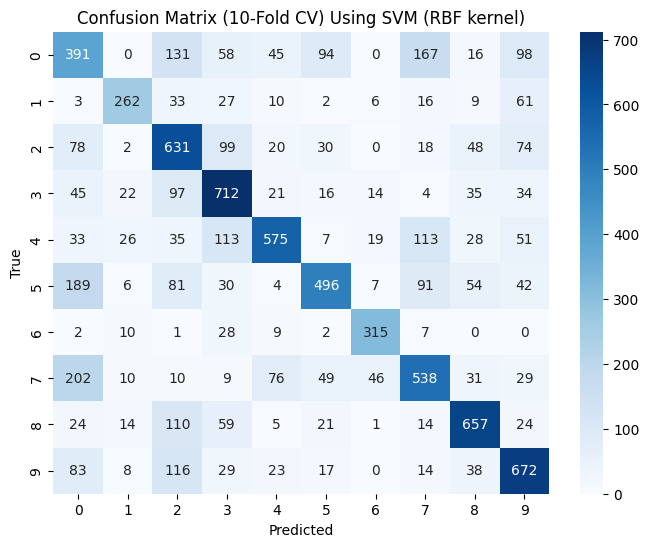

              precision    recall  f1-score   support

           0       0.37      0.39      0.38      1000
           1       0.73      0.61      0.66       429
           2       0.51      0.63      0.56      1000
           3       0.61      0.71      0.66      1000
           4       0.73      0.57      0.64      1000
           5       0.68      0.50      0.57      1000
           6       0.77      0.84      0.81       374
           7       0.55      0.54      0.54      1000
           8       0.72      0.71      0.71       929
           9       0.62      0.67      0.64      1000

    accuracy                           0.60      8732
   macro avg       0.63      0.62      0.62      8732
weighted avg       0.61      0.60      0.60      8732



In [52]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
_ = train_with_10fold(svc, 'SVM (RBF kernel)')


Fold 0 Accuracy: 0.5281
Fold 1 Accuracy: 0.6092
Fold 2 Accuracy: 0.5232
Fold 3 Accuracy: 0.5848
Fold 4 Accuracy: 0.5876
Fold 5 Accuracy: 0.5553
Fold 6 Accuracy: 0.6158
Fold 7 Accuracy: 0.6017
Fold 8 Accuracy: 0.6201
Fold 9 Accuracy: 0.6308

Average Accuracy: 0.5857
Total: 8732


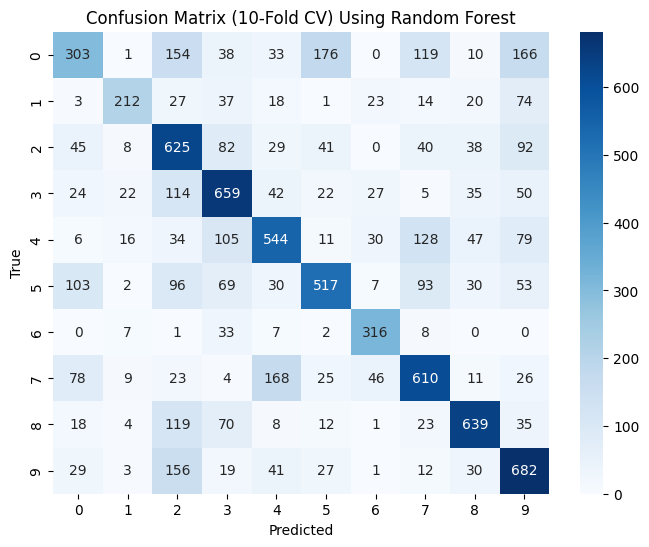

              precision    recall  f1-score   support

           0       0.50      0.30      0.38      1000
           1       0.75      0.49      0.59       429
           2       0.46      0.62      0.53      1000
           3       0.59      0.66      0.62      1000
           4       0.59      0.54      0.57      1000
           5       0.62      0.52      0.56      1000
           6       0.70      0.84      0.77       374
           7       0.58      0.61      0.59      1000
           8       0.74      0.69      0.71       929
           9       0.54      0.68      0.60      1000

    accuracy                           0.58      8732
   macro avg       0.61      0.60      0.59      8732
weighted avg       0.59      0.58      0.58      8732



In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
_ = train_with_10fold(rf, 'Random Forest')

Fold 0 Accuracy: 0.5200
Fold 1 Accuracy: 0.5664
Fold 2 Accuracy: 0.5319
Fold 3 Accuracy: 0.5646
Fold 4 Accuracy: 0.6282
Fold 5 Accuracy: 0.5504
Fold 6 Accuracy: 0.5907
Fold 7 Accuracy: 0.6154
Fold 8 Accuracy: 0.6593
Fold 9 Accuracy: 0.6201

Average Accuracy: 0.5847
Total: 8732


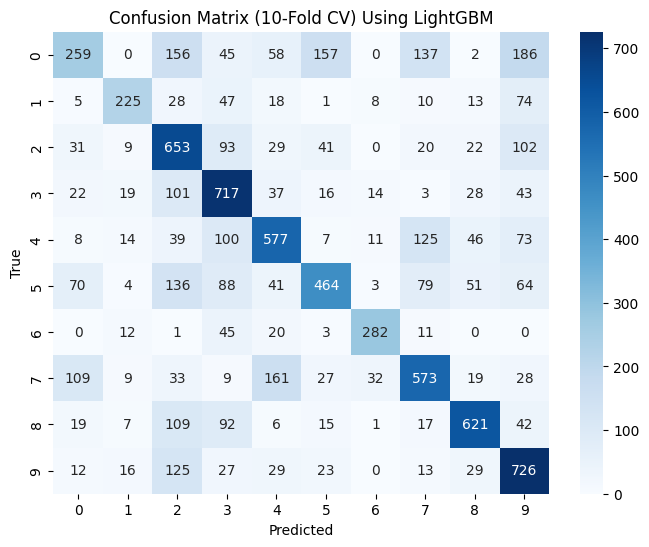

              precision    recall  f1-score   support

           0       0.48      0.26      0.34      1000
           1       0.71      0.52      0.60       429
           2       0.47      0.65      0.55      1000
           3       0.57      0.72      0.63      1000
           4       0.59      0.58      0.58      1000
           5       0.62      0.46      0.53      1000
           6       0.80      0.75      0.78       374
           7       0.58      0.57      0.58      1000
           8       0.75      0.67      0.71       929
           9       0.54      0.73      0.62      1000

    accuracy                           0.58      8732
   macro avg       0.61      0.59      0.59      8732
weighted avg       0.59      0.58      0.58      8732



In [54]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(verbose = 0)
_ = train_with_10fold(lgb, 'LightGBM')

Fold 0 Accuracy: 0.5178
Fold 1 Accuracy: 0.5991
Fold 2 Accuracy: 0.5362
Fold 3 Accuracy: 0.5758
Fold 4 Accuracy: 0.5940
Fold 5 Accuracy: 0.5395
Fold 6 Accuracy: 0.5943
Fold 7 Accuracy: 0.5732
Fold 8 Accuracy: 0.6495
Fold 9 Accuracy: 0.6332

Average Accuracy: 0.5813
Total: 8732


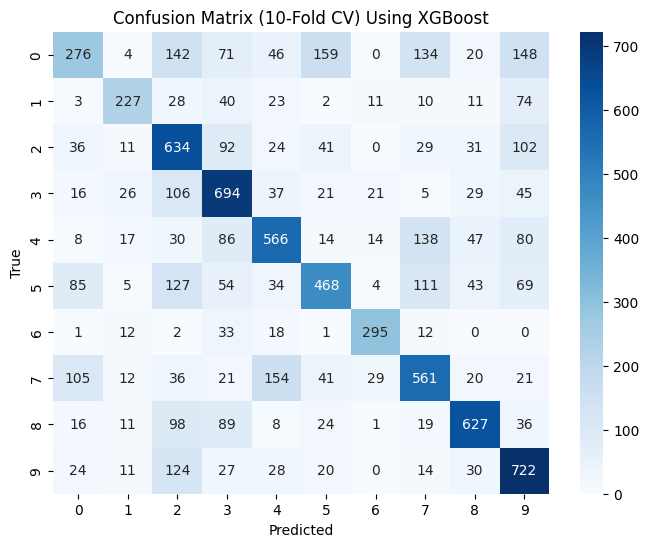

              precision    recall  f1-score   support

           0       0.48      0.28      0.35      1000
           1       0.68      0.53      0.59       429
           2       0.48      0.63      0.54      1000
           3       0.57      0.69      0.63      1000
           4       0.60      0.57      0.58      1000
           5       0.59      0.47      0.52      1000
           6       0.79      0.79      0.79       374
           7       0.54      0.56      0.55      1000
           8       0.73      0.67      0.70       929
           9       0.56      0.72      0.63      1000

    accuracy                           0.58      8732
   macro avg       0.60      0.59      0.59      8732
weighted avg       0.58      0.58      0.57      8732



In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
_ = train_with_10fold(xgb, 'XGBoost')

In [56]:
results_before_tuning = {
    'Logistic': {'0': 0.36, '1': 0.57, '2': 0.54, '3': 0.59, '4': 0.60, 
                 '5': 0.52, '6': 0.67, '7': 0.57, '8': 0.69, '9': 0.58},
    'KNN':      {'0': 0.35, '1': 0.55, '2': 0.45, '3': 0.56, '4': 0.48, 
                 '5': 0.48, '6': 0.76, '7': 0.39, '8': 0.64, '9': 0.56},
    'SVM-RBF':  {'0': 0.38, '1': 0.66, '2': 0.56, '3': 0.66, '4': 0.64, 
                 '5': 0.57, '6': 0.81, '7': 0.54, '8': 0.71, '9': 0.64},
    'RF':       {'0': 0.38, '1': 0.59, '2': 0.53, '3': 0.62, '4': 0.57, 
                 '5': 0.56, '6': 0.77, '7': 0.59, '8': 0.71, '9': 0.60},
    'LGBM':     {'0': 0.34, '1': 0.60, '2': 0.55, '3': 0.63, '4': 0.58, 
                 '5': 0.53, '6': 0.78, '7': 0.58, '8': 0.71, '9': 0.62},
    'XGB':      {'0': 0.35, '1': 0.59, '2': 0.54, '3': 0.63, '4': 0.58, 
                 '5': 0.52, '6': 0.79, '7': 0.55, '8': 0.70, '9': 0.63},
}

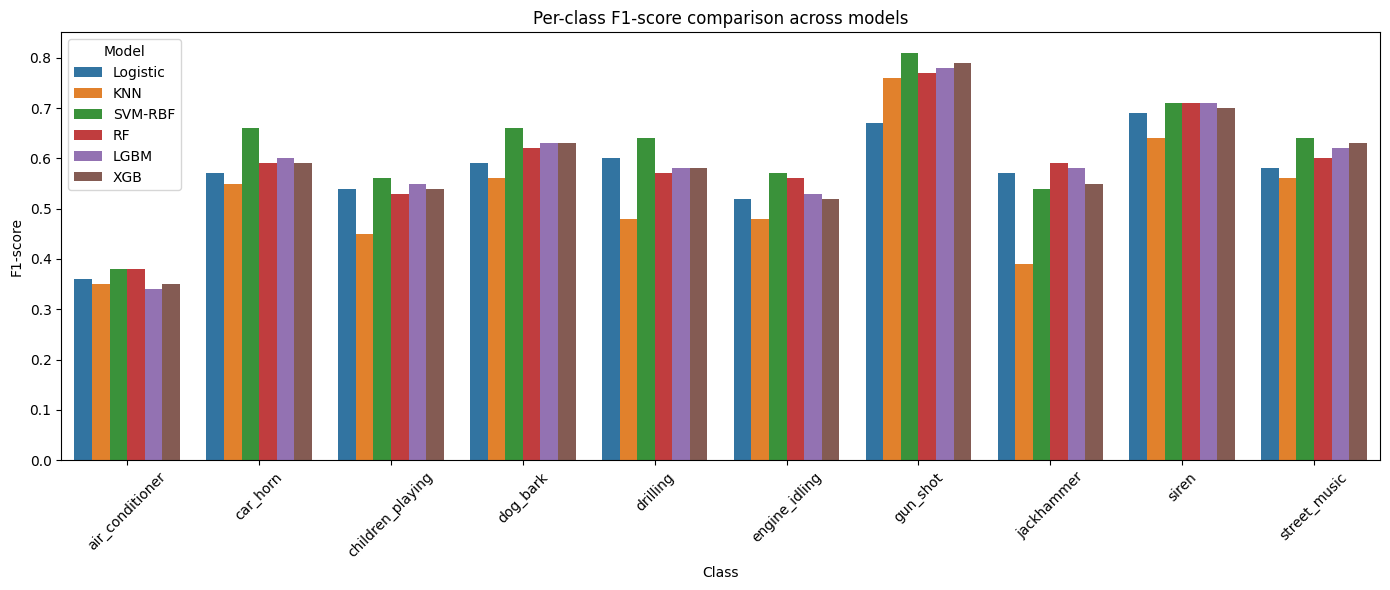

In [57]:
df = pd.DataFrame(results_before_tuning).T  # 模型為 index，label 為 column
df = df.reset_index().melt(id_vars='index', var_name='Class', value_name='F1-score')
df.rename(columns={'index': 'Model'}, inplace=True)

# 對照 label 名稱（如果有 label_dict 的話）
df['Class'] = df['Class'].astype(int).map(label_dict)

# 繪圖
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Class', y='F1-score', hue='Model')
plt.xticks(rotation=45)
plt.title("Per-class F1-score comparison across models")
plt.tight_layout()
plt.show()

In [58]:
acc_before_tuning = {
    "Logistic": 0.5595,
    "KNN": 0.4962,
    "SVM-RBF": 0.6029,
    "RF": 0.5857,
    "LGBM": 0.5847,
    "XGB": 0.5813
}

df = pd.DataFrame({
    'model': acc_before_tuning.keys(),
    'acc': acc_before_tuning.values()
})

C:\Users\user\AppData\Local\Temp\ipykernel_23548\1456932362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='model', y='acc', palette = 'deep')


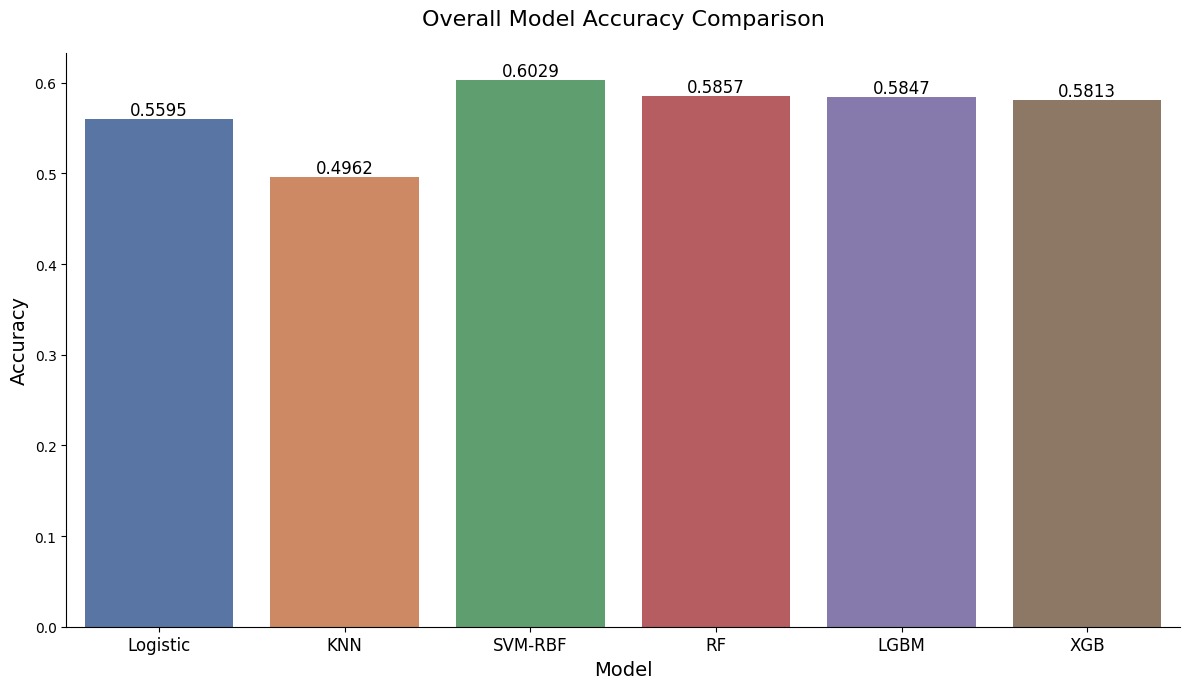

In [59]:
plt.figure(figsize=(12, 7)) 
ax = sns.barplot(data=df, x='model', y='acc', palette = 'deep')

for i in range(6):
	ax.bar_label(ax.containers[i], fmt='%.4f', fontsize=12) 

plt.title("Overall Model Accuracy Comparison", fontsize=16, pad=20)
plt.xlabel("Model", fontsize=14)
plt.xticks(fontsize=12) 
plt.ylabel("Accuracy", fontsize=14) 
sns.despine()
plt.tight_layout() 
plt.show()

In [62]:
def train_with_10fold_for_optuna(model, data_dir='../data/orig'):
    accuracies = []

    for test_id in range(10):
        # Combine folds except the test fold
        dfs = [pd.read_csv(f'{data_dir}/fold{i}.csv') for i in range(10) if i != test_id]
        train_df = pd.concat(dfs, ignore_index=True)
        test_df = pd.read_csv(f'{data_dir}/fold{test_id}.csv')

        X_train, y_train = train_df.drop(['label', 'audio'], axis=1), train_df['label']
        X_test, y_test = test_df.drop(['label', 'audio'], axis=1), test_df['label']

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    return np.mean(accuracies)


In [78]:
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-2, 100, log = True)
    gamma = trial.suggest_float('gamma', 1e-4, 1e-1, log = True)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = SVC(
        kernel='rbf',
        C=C,
        gamma=gamma,
        class_weight=class_weight,
        random_state=42
    )
    
    score = train_with_10fold_for_optuna(model)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective_svm, n_trials=30)

print(study.best_params)
print(study.best_value)

[I 2025-06-09 03:34:16,368] A new study created in memory with name: no-name-73ad4a65-b9d6-424e-90d0-129d611eda9a
[I 2025-06-09 03:34:39,666] Trial 0 finished with value: 0.28808651325235685 and parameters: {'C': 0.030559967581968554, 'gamma': 0.0011129590370476665, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.28808651325235685.
[I 2025-06-09 03:34:50,029] Trial 1 finished with value: 0.568512386135151 and parameters: {'C': 9.999544271941275, 'gamma': 0.0006370795074345251, 'class_weight': None}. Best is trial 1 with value: 0.568512386135151.
[I 2025-06-09 03:35:00,834] Trial 2 finished with value: 0.5638314993635418 and parameters: {'C': 15.987088951183209, 'gamma': 0.00041349882290466795, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.568512386135151.
[I 2025-06-09 03:35:11,863] Trial 3 finished with value: 0.5667519398195457 and parameters: {'C': 2.4275543277786653, 'gamma': 0.0018842523884033454, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.5

{'C': 2.2897212296481553, 'gamma': 0.01592554192029433, 'class_weight': 'balanced'}
0.6042094907967044


Fold 0 Accuracy: 0.5819
Fold 1 Accuracy: 0.5721
Fold 2 Accuracy: 0.5081
Fold 3 Accuracy: 0.5778
Fold 4 Accuracy: 0.6335
Fold 5 Accuracy: 0.5395
Fold 6 Accuracy: 0.6802
Fold 7 Accuracy: 0.6315
Fold 8 Accuracy: 0.6544
Fold 9 Accuracy: 0.6631

Average Accuracy: 0.6042
Total: 8732


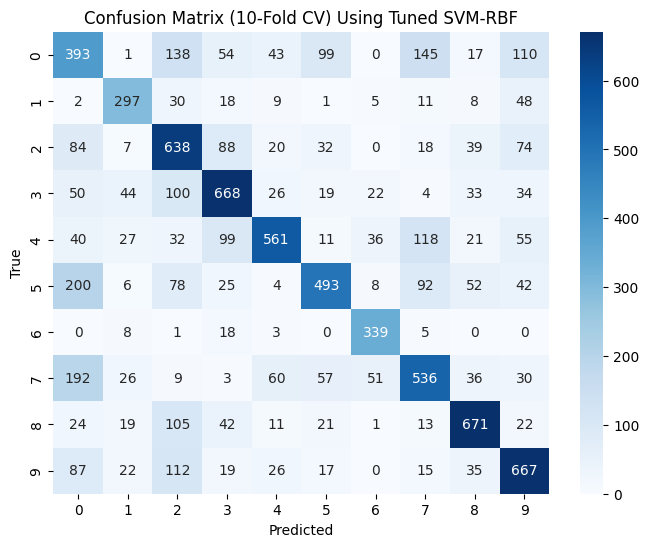

              precision    recall  f1-score   support

           0       0.37      0.39      0.38      1000
           1       0.65      0.69      0.67       429
           2       0.51      0.64      0.57      1000
           3       0.65      0.67      0.66      1000
           4       0.74      0.56      0.64      1000
           5       0.66      0.49      0.56      1000
           6       0.73      0.91      0.81       374
           7       0.56      0.54      0.55      1000
           8       0.74      0.72      0.73       929
           9       0.62      0.67      0.64      1000

    accuracy                           0.60      8732
   macro avg       0.62      0.63      0.62      8732
weighted avg       0.61      0.60      0.60      8732



In [79]:
params = study.best_params

svc = SVC(**params)
_ = train_with_10fold(svc, 'Tuned SVM-RBF')

In [81]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs = -1
    )
    
    score = train_with_10fold_for_optuna(model)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=30)

print(study.best_params)
print(study.best_value)

[I 2025-06-09 03:45:28,072] A new study created in memory with name: no-name-96c6fc18-00c6-4580-9d68-97143121b70e
[I 2025-06-09 03:45:31,403] Trial 0 finished with value: 0.5501566775693971 and parameters: {'n_estimators': 209, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5501566775693971.
[I 2025-06-09 03:45:35,108] Trial 1 finished with value: 0.59385282670427 and parameters: {'n_estimators': 168, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.59385282670427.
[I 2025-06-09 03:45:42,027] Trial 2 finished with value: 0.5910599058041814 and parameters: {'n_estimators': 278, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.59385282670427.
[I 2025-06-09 03:45:44,631] Trial 3 finished with value: 0.5886951658197156 and parameters: {'n_estimators': 115, 'max_depth': 24, 'min_samples_leaf': 5, 

{'n_estimators': 233, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.5986097481572538


Fold 0 Accuracy: 0.5430
Fold 1 Accuracy: 0.5901
Fold 2 Accuracy: 0.5438
Fold 3 Accuracy: 0.5606
Fold 4 Accuracy: 0.5908
Fold 5 Accuracy: 0.5468
Fold 6 Accuracy: 0.6420
Fold 7 Accuracy: 0.5906
Fold 8 Accuracy: 0.6422
Fold 9 Accuracy: 0.6428

Average Accuracy: 0.5893
Total: 8732


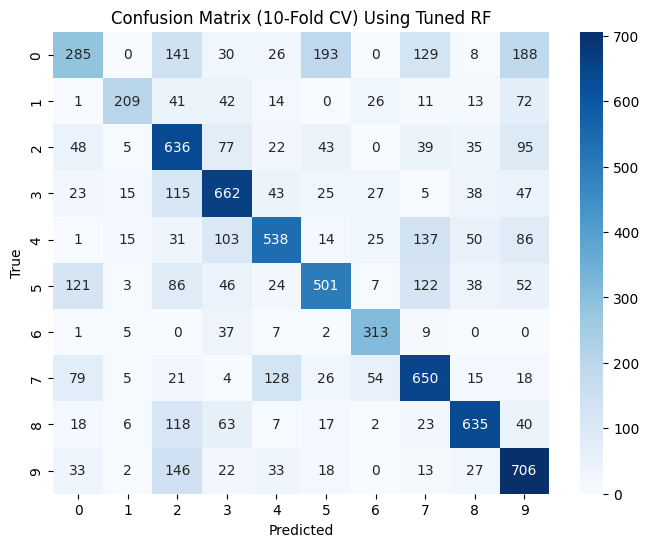

              precision    recall  f1-score   support

           0       0.47      0.28      0.35      1000
           1       0.79      0.49      0.60       429
           2       0.48      0.64      0.54      1000
           3       0.61      0.66      0.63      1000
           4       0.64      0.54      0.58      1000
           5       0.60      0.50      0.54      1000
           6       0.69      0.84      0.76       374
           7       0.57      0.65      0.61      1000
           8       0.74      0.68      0.71       929
           9       0.54      0.71      0.61      1000

    accuracy                           0.59      8732
   macro avg       0.61      0.60      0.60      8732
weighted avg       0.59      0.59      0.58      8732



In [83]:
params = study.best_params

rf = RandomForestClassifier(**params)
_ = train_with_10fold(rf, 'Tuned RF')

In [87]:
def objective_lgbm(trial):
    num_leaves = trial.suggest_int('num_leaves', 15, 60)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    min_child_samples = trial.suggest_int('min_child_samples', 10, 50)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)

    model = LGBMClassifier(
        num_leaves=num_leaves,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        min_child_samples=min_child_samples,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    score = train_with_10fold_for_optuna(model)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective_lgbm, n_trials=30)

print(study.best_params)
print(study.best_value)

[I 2025-06-09 03:52:51,888] A new study created in memory with name: no-name-f685e473-e0f3-4e57-99ee-fb8b09eefe7b
[I 2025-06-09 03:53:11,906] Trial 0 finished with value: 0.6015022756481747 and parameters: {'num_leaves': 60, 'learning_rate': 0.08267850352399793, 'n_estimators': 262, 'min_child_samples': 14, 'subsample': 0.6317632093117139, 'colsample_bytree': 0.6184210526930339}. Best is trial 0 with value: 0.6015022756481747.
[I 2025-06-09 03:53:34,339] Trial 1 finished with value: 0.5491976780591794 and parameters: {'num_leaves': 53, 'learning_rate': 0.001186950764000696, 'n_estimators': 246, 'min_child_samples': 36, 'subsample': 0.6422316891615699, 'colsample_bytree': 0.8664591866375193}. Best is trial 0 with value: 0.6015022756481747.
[I 2025-06-09 03:53:56,351] Trial 2 finished with value: 0.5725926082510016 and parameters: {'num_leaves': 47, 'learning_rate': 0.0030185064044751203, 'n_estimators': 260, 'min_child_samples': 26, 'subsample': 0.6144906897382306, 'colsample_bytree': 0

{'num_leaves': 48, 'learning_rate': 0.09632555864484324, 'n_estimators': 236, 'min_child_samples': 32, 'subsample': 0.9957530103461371, 'colsample_bytree': 0.6561356463081381}
0.602093943928994


Fold 0 Accuracy: 0.5246
Fold 1 Accuracy: 0.6014
Fold 2 Accuracy: 0.5622
Fold 3 Accuracy: 0.5768
Fold 4 Accuracy: 0.6090
Fold 5 Accuracy: 0.5541
Fold 6 Accuracy: 0.6062
Fold 7 Accuracy: 0.6489
Fold 8 Accuracy: 0.6532
Fold 9 Accuracy: 0.6476

Average Accuracy: 0.5984
Total: 8732


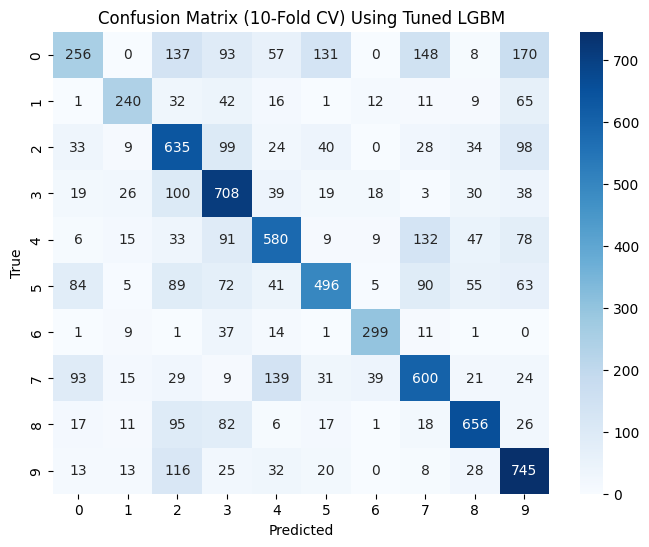

              precision    recall  f1-score   support

           0       0.49      0.26      0.34      1000
           1       0.70      0.56      0.62       429
           2       0.50      0.64      0.56      1000
           3       0.56      0.71      0.63      1000
           4       0.61      0.58      0.60      1000
           5       0.65      0.50      0.56      1000
           6       0.78      0.80      0.79       374
           7       0.57      0.60      0.59      1000
           8       0.74      0.71      0.72       929
           9       0.57      0.74      0.65      1000

    accuracy                           0.60      8732
   macro avg       0.62      0.61      0.60      8732
weighted avg       0.60      0.60      0.59      8732



In [89]:
params = study.best_params

lgbm = LGBMClassifier(**params)
_ = train_with_10fold(lgbm, 'Tuned LGBM')

In [7]:
lgbm_F1 = {
    'Before Tuning':	{'0': 0.28, '1': 0.43, '2': 0.50, '3': 0.55, '4': 0.62, 
                 		 '5': 0.49, '6': 0.64, '7': 0.52, '8': 0.55, '9': 0.56},
    'Tuned':      		{'0': 0.29, '1': 0.42, '2': 0.51, '3': 0.59, '4': 0.61, 
                 		 '5': 0.51, '6': 0.69, '7': 0.55, '8': 0.54, '9': 0.55},
}

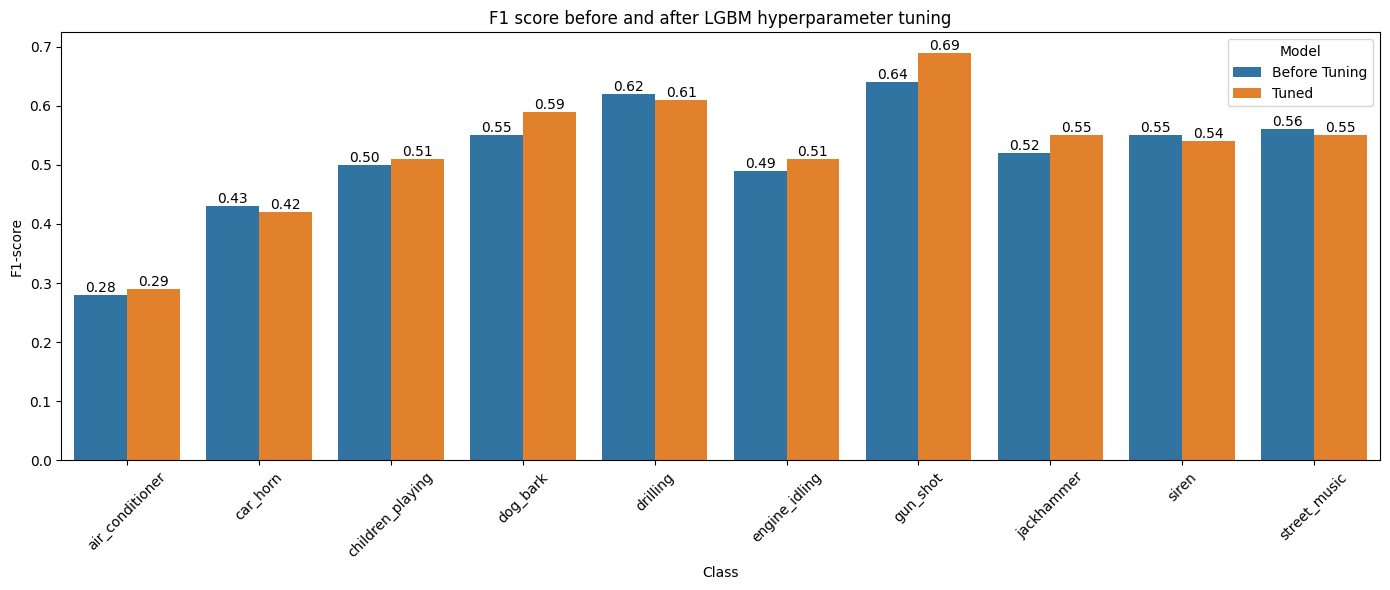

In [9]:
df = pd.DataFrame(lgbm_F1).T  # 模型為 index，label 為 column
df = df.reset_index().melt(id_vars='index', var_name='Class', value_name='F1-score')
df.rename(columns={'index': 'Model'}, inplace=True)

# 對照 label 名稱（如果有 label_dict 的話）
df['Class'] = df['Class'].astype(int).map(label_dict)

# 繪圖
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df, x='Class', y='F1-score', hue='Model')
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10)
ax.bar_label(ax.containers[1], fmt='%.2f', fontsize=10)
plt.xticks(rotation=45)
plt.title("F1 score before and after LGBM hyperparameter tuning")
plt.tight_layout()
plt.show()

In [91]:
pickle.dump(svc, open('../models/SVM.pkl', 'wb'))
pickle.dump(rf, open('../models/RF.pkl', 'wb'))
pickle.dump(lgbm, open('../models/LGBM.pkl', 'wb'))